# Review Data from TransparentCalifornia

In [115]:
import sys
!{sys.executable} -m pip install pandas matplotlib ipywidgets scipy pandas_profiling genderize gender_guesser seaborn statsmodels

import requests
from io import StringIO
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib
%matplotlib inline
from genderize import Genderize
import gender_guesser.detector as gender
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels


You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Fetch data from publicpay.ca.gov
df = None
for year in range(2011,2020):    
    year_df = pd.read_csv(f'state-of-california-{year}.csv.zip', compression='zip', 
                          usecols=['Employee Name', 'Job Title', 'Year', 'Base Pay'])
    year_df = year_df[year_df['Base Pay'].ne('Not Provided')]
    year_df['Base Pay'] = pd.to_numeric(year_df['Base Pay']).astype('float64')
    year_df['Job Title'] = year_df['Job Title'].str.upper()
    year_df['Employee Name'] = year_df['Employee Name'].str.title()
    print(f'Year {year} Rows {len(year_df)}')
    df = year_df if df is None else df.append(year_df)

/Users/bryanchan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Year 2011 Rows 246599


/Users/bryanchan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Year 2012 Rows 244881


/Users/bryanchan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Year 2013 Rows 235071


/Users/bryanchan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Year 2014 Rows 240531


/Users/bryanchan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Year 2015 Rows 246273


/Users/bryanchan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Year 2016 Rows 248272


/Users/bryanchan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Year 2017 Rows 247697


/Users/bryanchan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Year 2018 Rows 253503


/Users/bryanchan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Year 2019 Rows 260277


In [3]:
print(df.columns)

Index(['Employee Name', 'Job Title', 'Base Pay', 'Year'], dtype='object')


### Profiling Report

In [4]:
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# profile

### Top 20 Job Titles

<AxesSubplot:>

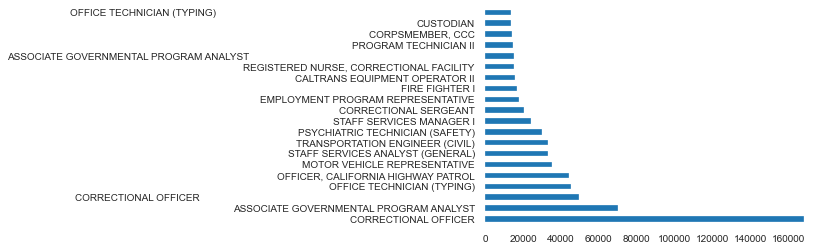

In [5]:
df['Job Title'].value_counts()[0:20].plot(kind='barh')

# Compute Genders

In [6]:
df['First Name'] = df['Employee Name'].str.split(n=2).str[0]

In [7]:
d = gender.Detector()
df['Gender'] = df['First Name'].apply(lambda name: d.get_gender(name.title()))

# Rate limited, so let's not use this for now
# Genderize().get(df['First Name'])

In [8]:
df[['First Name', 'Gender']][0:100]

,First Name,Gender
0,Mohammad,male
1,Gertrudis,female
2,Joseph,male
3,Thomas,male
4,Curtis,male
...,...,...
95,Michael,male
96,Theodore,male
97,Dennis,male
98,Wadsworth,unknown


### Gender Distribution

<AxesSubplot:>

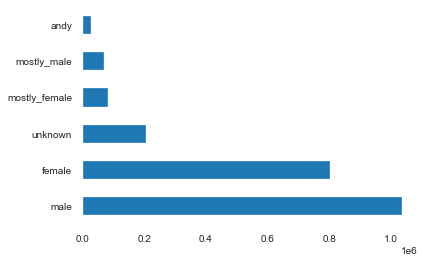

In [9]:
df['Gender'].value_counts()[0:100].plot(kind='barh')

In [10]:
mean_salary_df = df.groupby(['Job Title', 'Gender'])['Base Pay'].mean()

In [11]:
mean_salary_df

Job Title                                                                                                                 Gender       
02                                                                                                                        female           42839.492000
                                                                                                                          male             35332.539412
                                                                                                                          mostly_female    26698.620000
                                                                                                                          mostly_male      30393.350000
                                                                                                                          unknown          45501.950000
                                                                                                        

### Remove Duplicates
Remove any employee name that appears in a year more than once.

@TODO Review whether this step is necessary or not

In [12]:
dupes_df = df.groupby(['Year', 'Employee Name'])['Base Pay'].count()

In [13]:
dupes_df[dupes_df > 2]

Year  Employee Name   
2011   Name Withheld      652
      Adam T Smith          4
      Adrian Gonzalez       3
      Alejandro Chavez      3
      Alejandro Garcia      3
                         ... 
2019  Yee Vue               3
      Yeng Xiong            3
      Yi Zhang              3
      Ying Yang             5
      Yolanda Gonzalez      3
Name: Base Pay, Length: 6417, dtype: int64

In [14]:
df = df.sort_values(['Year', 'Employee Name'])

In [15]:
df_no_dupes = df.drop_duplicates(subset=['Year', 'Employee Name'], keep=False)

In [16]:
df_no_dupes

,Employee Name,Job Title,Base Pay,Year,First Name,Gender
6143,Levin,LEAD APPELLATE COURT ATTORNEY ...,132378.09,2011,Levin,male
133753,Rouvaishyana,STATE PARK INTERPRETER II ...,56011.02,2011,Rouvaishyana,unknown
173212,A Ann Tucker,OFFICE SERVICES SUPERVISOR II (GENERAL) ...,41255.54,2011,A,unknown
171171,A Buzz Campbell,TRACTOR OPERATOR-LABORER ...,40689.57,2011,A,unknown
75871,A Canise Lewis,CLINICAL SOCIAL WORKER (HEALTH/CORRECTIONAL FA...,76270.38,2011,A,unknown
...,...,...,...,...,...,...
135172,Zuzana B Bursik,ADMINISTRATIVE SPECIALIST,71907.00,2019,Zuzana,female
128450,Zuzana Loviskova,ADOPTIONS SPECIALIST,74721.00,2019,Zuzana,female
59630,Zuzana M Vona,AIR POLLUTION SPECIALIST,109439.03,2019,Zuzana,female
219829,Zvonimir Sola,DEPUTY ATTORNEY GENERAL,28010.00,2019,Zvonimir,male


In [17]:
dupes_df2 = df_no_dupes.groupby(['Year', 'Employee Name'])['Base Pay'].count()

In [18]:
dupes_df2[dupes_df2 > 2]

Series([], Name: Base Pay, dtype: int64)

In [19]:
df = df_no_dupes

### Add a year number column (based on years in the database, by employee name)

In [117]:
df['Year Number'] = df.groupby(['Employee Name'])['Year'].rank("dense", ascending=True)

df['Year in Job'] = df.groupby(['Employee Name', 'Job Title'])['Year'].rank("dense", ascending=True)

In [119]:
df

,Employee Name,Job Title,Base Pay,Year,First Name,Gender,Year Number,Year in Job
6143,Levin,LEAD APPELLATE COURT ATTORNEY ...,132378.09,2011,Levin,male,1.0,1.0
133753,Rouvaishyana,STATE PARK INTERPRETER II ...,56011.02,2011,Rouvaishyana,unknown,1.0,1.0
173212,A Ann Tucker,OFFICE SERVICES SUPERVISOR II (GENERAL) ...,41255.54,2011,A,unknown,1.0,1.0
171171,A Buzz Campbell,TRACTOR OPERATOR-LABORER ...,40689.57,2011,A,unknown,1.0,1.0
75871,A Canise Lewis,CLINICAL SOCIAL WORKER (HEALTH/CORRECTIONAL FA...,76270.38,2011,A,unknown,1.0,1.0
...,...,...,...,...,...,...,...,...
135172,Zuzana B Bursik,ADMINISTRATIVE SPECIALIST,71907.00,2019,Zuzana,female,9.0,4.0
128450,Zuzana Loviskova,ADOPTIONS SPECIALIST,74721.00,2019,Zuzana,female,4.0,4.0
59630,Zuzana M Vona,AIR POLLUTION SPECIALIST,109439.03,2019,Zuzana,female,9.0,7.0
219829,Zvonimir Sola,DEPUTY ATTORNEY GENERAL,28010.00,2019,Zvonimir,male,2.0,2.0


In [118]:
df.to_csv('all_years_with_gender.csv', index=True)

### Look at distributions

In [113]:
from scipy import stats
import ipywidgets as widgets

In [60]:
popular_jobs_df = df.groupby(['Job Title'], as_index=False)['Employee Name'] \
    .count() \
    .rename(columns={"Employee Name": "Count"}) \
    .sort_values(["Count"], ascending=False)

In [61]:
popular_jobs_df

,Job Title,Count
2286,CORRECTIONAL OFFICER,157193
853,ASSOCIATE GOVERNMENTAL PROGRAM ANALYST,67801
2287,CORRECTIONAL OFFICER ...,46078
5582,OFFICE TECHNICIAN (TYPING),43338
5593,"OFFICER, CALIFORNIA HIGHWAY PATROL",42429
...,...,...
8287,SUPERVISING HAZARDOUS SUBSTANCES SCIENTIST II,1
2575,"DEPUTY DIRECTOR, BOARD AND BUREAU RELATIONS ...",1
2579,"DEPUTY DIRECTOR, BUREAU RELATIONS",1
2581,"DEPUTY DIRECTOR, BUSINESS INVESTMENT SERVICES ...",1


### Select a Job

In [107]:
job_select = widgets.Select(
    options=popular_jobs_df.sort_values(["Count"], ascending=False)["Job Title"][0:100],
)
display(job_select)

Select(options=('CORRECTIONAL OFFICER', 'ASSOCIATE GOVERNMENTAL PROGRAM ANALYST', 'CORRECTIONAL OFFICER       …

### Plot Gender Distributions

CORRECTIONAL OFFICER


ImportError: Cumulative distributions are currently only implemented in statsmodels. Please install statsmodels.

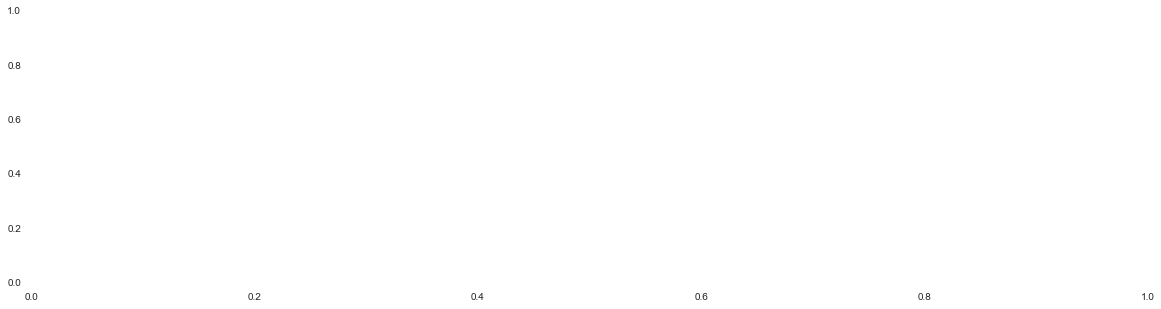

In [116]:
def plot(job_title, gender, ax, color):
    gender_df = df[(df['Job Title'] == job_title) & (df['Gender'] == gender) & (df['Year Number'] == 2)]
    sns.distplot(gender_df['Base Pay'], ax=ax, hist=False, kde=True, kde_kws={'cumulative': True}, color=color)
    
def update_plot(event):
    print(job_select.value)
    fig, ax = plt.subplots(figsize=(20,5))
    
    plot(job_select.value, 'female', ax, 'orange')
    plot(job_select.value, 'male', ax, 'green')
    
job_select.observe(update_plot, names="value")
update_plot(5)